<a href="https://colab.research.google.com/github/sumantn16/Exploratory_Data_Analysis/blob/master/Murder_Victim_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Technical Presentation/Murder_victim_age.csv')

In [5]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


In [0]:
name=[]
for i in df['Group_Name']:
  x=i.split('-')
  name.append(x[1])

In [0]:
df['Group_Name'] = name

In [0]:
df = df.rename(columns={'Area_Name':'Area','Group_Name':'Group','Victims_Above_50_Yrs':'Above_50','Victims_Total':'Total','Victims_Upto_10_15_Yrs':'10_15_Yrs','Victims_Upto_10_Yrs':'Upto_10',
                       'Victims_Upto_15_18_Yrs':'15_18_Yrs','Victims_Upto_18_30_Yrs':'18_30_Yrs','Victims_Upto_30_50_Yrs':'30_50_Yrs'})

In [0]:
df = df.drop(['Sub_Group_Name'],1)

In [10]:
df.isnull().sum()

Area           0
Year           0
Group          0
Above_50      56
Total          0
10_15_Yrs    142
Upto_10      118
15_18_Yrs    130
18_30_Yrs      9
30_50_Yrs     11
dtype: int64

In [0]:
df = df.fillna(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
Area         1018 non-null object
Year         1018 non-null int64
Group        1018 non-null object
Above_50     1018 non-null float64
Total        1018 non-null int64
10_15_Yrs    1018 non-null float64
Upto_10      1018 non-null float64
15_18_Yrs    1018 non-null float64
18_30_Yrs    1018 non-null float64
30_50_Yrs    1018 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 79.6+ KB


In [0]:
df[['Above_50','10_15_Yrs','Upto_10','15_18_Yrs','18_30_Yrs','30_50_Yrs']] = df[['Above_50','10_15_Yrs','Upto_10','15_18_Yrs','18_30_Yrs','30_50_Yrs']].astype('int64')

In [14]:
df.Area.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Dadra & Nagar Haveli', 'Daman & Diu'], dtype=object)

In [0]:
df['Area']=df['Area'].replace(to_replace=['Andaman & Nicobar Islands','Dadra & Nagar Haveli', 'Daman & Diu','Lakshadweep','Puducherry'],value='NT')
df['Area']=df['Area'].replace(to_replace=['Karnataka', 'Kerala','Tamil Nadu','Andhra Pradesh'],value='South')
df['Area']=df['Area'].replace(to_replace=['Chandigarh','Delhi','Haryana', 'Himachal Pradesh', 'Jammu & Kashmir','Punjab','Uttar Pradesh', 'Uttarakhand'],value='North')
df['Area']=df['Area'].replace(to_replace=['Arunachal Pradesh','Assam','Manipur', 'Meghalaya', 'Mizoram','Nagaland','Sikkim','Tripura','West Bengal'],value='East')
df['Area']=df['Area'].replace(to_replace=['Goa','Gujarat','Maharashtra','Rajasthan'],value='West')
df['Area']=df['Area'].replace(to_replace=['Chhattisgarh','Madhya Pradesh','Odisha','Bihar','Jharkhand'],value='Central')

In [0]:
df['Year'] = df['Year'].astype('category')

In [17]:
df.Year.unique()

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
Categories (10, int64): [2001, 2002, 2003, 2004, ..., 2007, 2008, 2009, 2010]

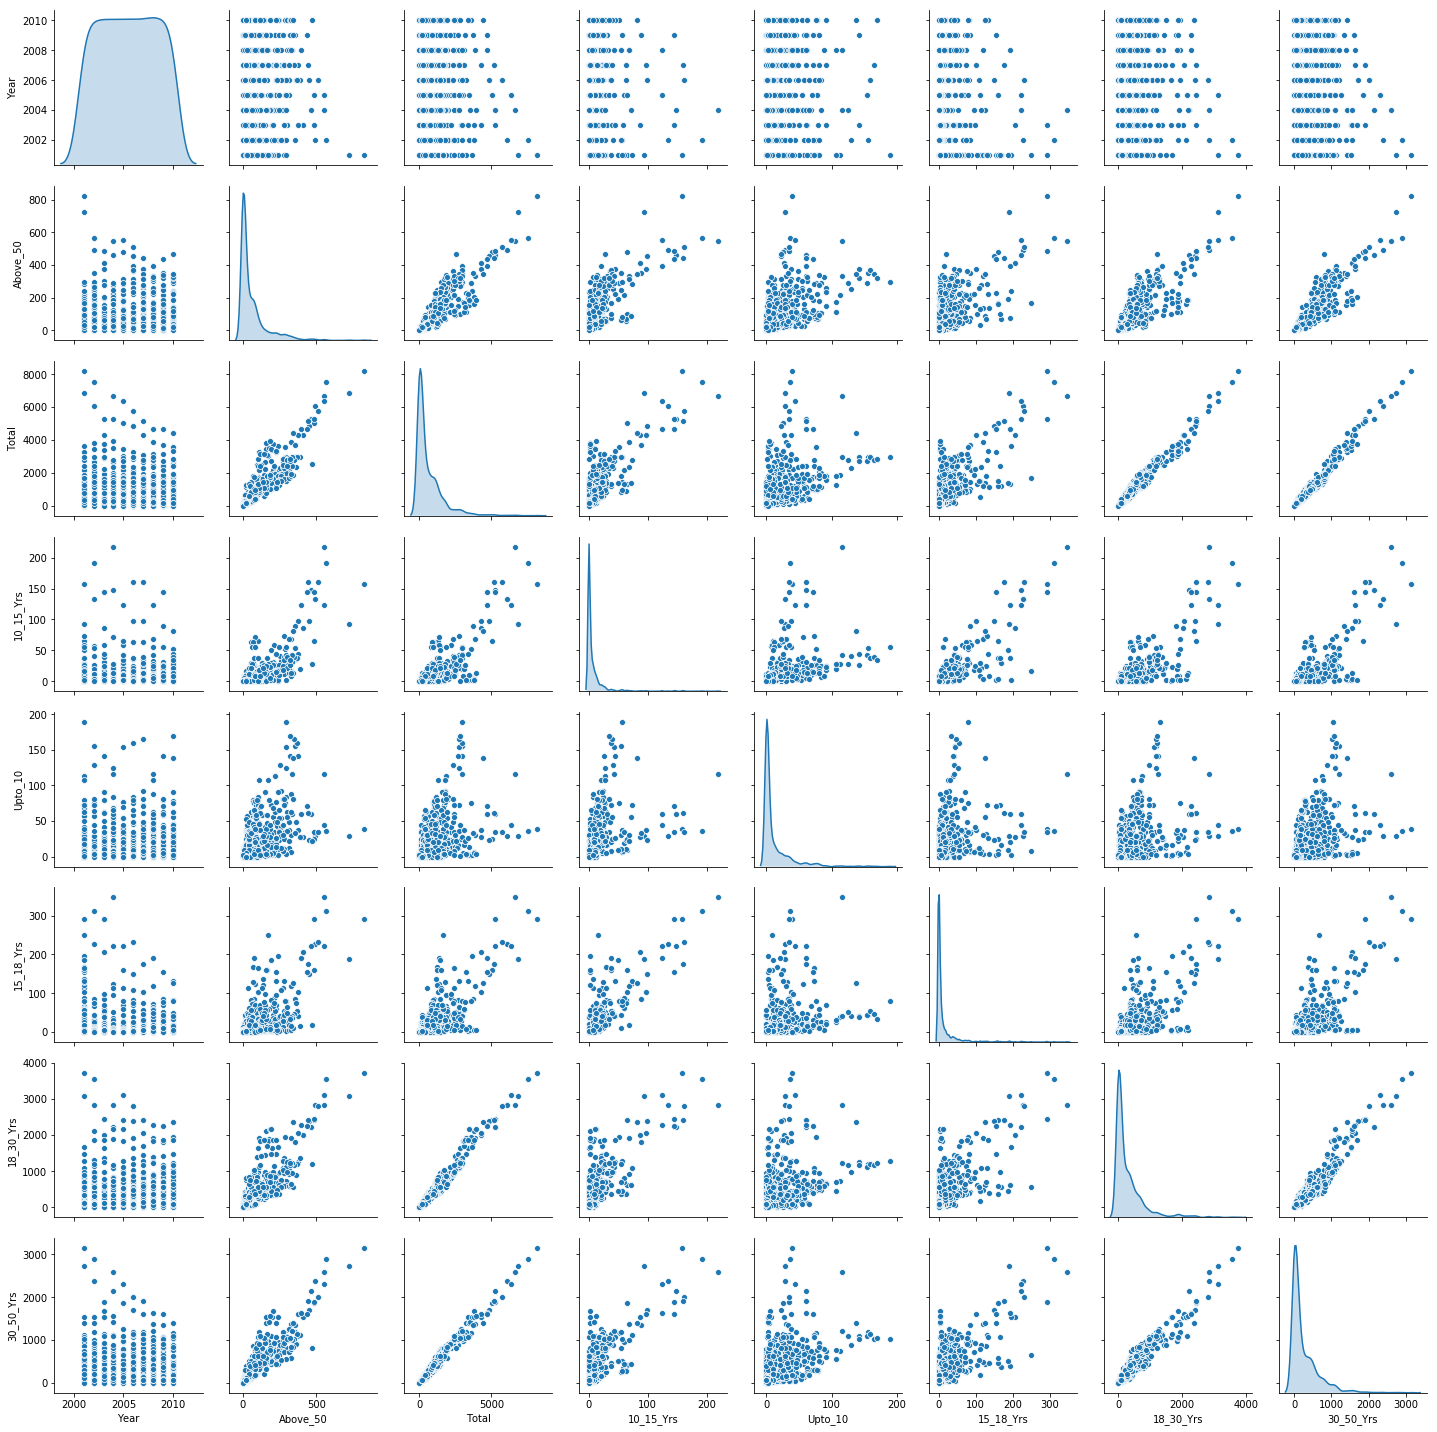

In [18]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [19]:
df.groupby(['Group'])['Total'].sum()

Group
 Female Victims     81580
 Male Victims      266274
 Total Victims     347854
Name: Total, dtype: int64

In [0]:
df = df[df.Group != ' Total Victims']

In [21]:
df.shape

(676, 10)

In [0]:
df['Year'] = df['Year'].astype('object')

In [0]:
df['Year']=df['Year'].replace(to_replace=[2001,2002,2003,2004],value='2001-04')
df['Year']=df['Year'].replace(to_replace=[2005,2006,2007],value='2005-07')
df['Year']=df['Year'].replace(to_replace=[2008,2009,2010],value='2008-10')

In [24]:
df.head()

,Area,Year,Group,Above_50,Total,10_15_Yrs,Upto_10,15_18_Yrs,18_30_Yrs,30_50_Yrs
0,NT,2001-04,Female Victims,0,6,0,0,0,4,2
1,South,2001-04,Female Victims,67,607,15,38,43,269,175
2,East,2001-04,Female Victims,2,16,0,0,0,10,4
3,East,2001-04,Female Victims,11,128,8,4,23,45,37
4,Central,2001-04,Female Victims,12,366,0,0,40,191,123


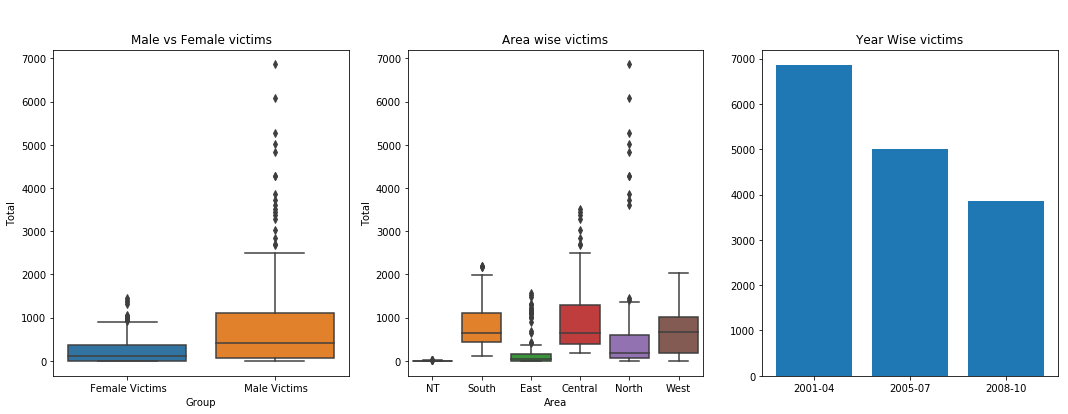

In [25]:
plt.figure(figsize=(18,6))
plt.suptitle(' ')

plt.subplot(131)
sns.boxplot(df['Group'],df['Total'])
plt.title('Male vs Female victims')

plt.subplot(132)
sns.boxplot(df['Area'],df['Total'])
plt.title('Area wise victims')

plt.subplot(133)
plt.bar(df['Year'],df['Total'])
plt.title('Year Wise victims')

plt.show()

- From here we can easily comment that number of male victims are much more than that of female victims in India.

- Also area wise distribution shows that there are high number of victims in Northern, Central and Southern region of the country while in case of national territories and eastern part, its quite lesser in number

- One more contrasting thing the numbers are telling that the number of victims are decreasing yearly in India.

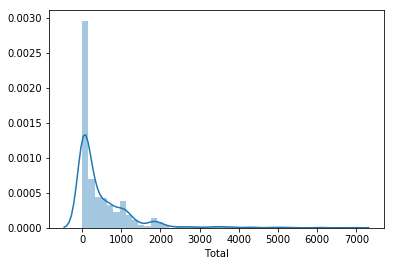

In [26]:
sns.distplot(df['Total'])
plt.show()

Here we can coclude that total number of victims distribution is highly right skewed. Maybe in some part of the country, such cases are periodically reported.

In [0]:
df['Log_Total'] = np.log(df['Total'])

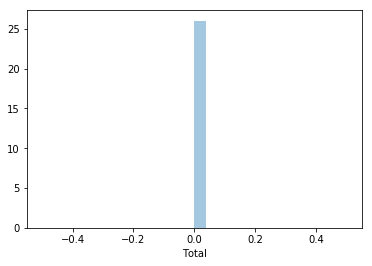

In [28]:
sns.distplot(np.log(pd.notnull(df['Total'])))
plt.show()

In [0]:
df = df.drop(['Log_Total'],1) 

In [29]:
df.columns

Index(['Area', 'Year', 'Group', 'Above_50', 'Total', '10_15_Yrs', 'Upto_10',
       '15_18_Yrs', '18_30_Yrs', '30_50_Yrs', 'Log_Total'],
      dtype='object')

In [0]:
X = df.loc[:,['Area', 'Year', 'Group', 'Above_50', '10_15_Yrs', 'Upto_10',
       '15_18_Yrs', '18_30_Yrs', '30_50_Yrs']]

y = df['Total']

In [33]:
X_categorical = X.select_dtypes(include=['object'])
X_categorical.head()

,Area,Year,Group
0,NT,2001-04,Female Victims
1,South,2001-04,Female Victims
2,East,2001-04,Female Victims
3,East,2001-04,Female Victims
4,Central,2001-04,Female Victims


In [35]:
df_dummies = pd.get_dummies(X_categorical)
df_dummies.head()

,Area_Central,Area_East,Area_NT,Area_North,Area_South,Area_West,Year_2001-04,Year_2005-07,Year_2008-10,Group_ Female Victims,Group_ Male Victims
0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0


In [0]:
X = X.drop(list(X_categorical.columns),1)

In [0]:
X = pd.concat([X,df_dummies],1)

In [0]:
from sklearn.preprocessing import scale

In [0]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                              test_size = 0.3, random_state=123)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = lr.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

1.0


In [0]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse',random_state=123)

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='mse',random_state=123)

In [0]:
model = []
model.append(('Decision Tree',dt))
model.append(('Random Forest',rf))

In [0]:
from sklearn import model_selection

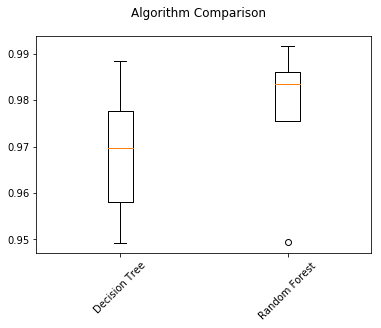

In [58]:
result=[]
names=[]
model_perf = []
for i,j in model:
    kfold = model_selection.KFold(5,random_state=123)
    accuracy = (model_selection.cross_val_score(j,X,y,scoring='r2',cv=kfold))
    result.append(accuracy)
    names.append(i)
    model_perf.append((np.average(result),np.var(result)))
    
#Plotting box plot 
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.xticks(rotation =45)
plt.show()

In [0]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator = dt,random_state=123)

In [0]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(base_estimator=dt,random_state=123)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(criterion = 'mse')

In [0]:
from sklearn.model_selection import GridSearchCV

In [63]:
dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')>

In [0]:
parameters = {'max_depth':list(range(3,10)),
              'max_features':list(range(1,9)),
             'min_samples_split':list(range(4,11)),
             'min_samples_leaf':list(range(3,6))}

In [65]:
parameters

{'max_depth': [3, 4, 5, 6, 7, 8, 9],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
 'min_samples_leaf': [3, 4, 5],
 'min_samples_split': [4, 5, 6, 7, 8, 9, 10]}

In [0]:
gridsearch = GridSearchCV(estimator = dt,param_grid=parameters)

In [67]:
gridsearch.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=123,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5],
                        

In [68]:
gridsearch.best_params_

{'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [0]:
gr = DecisionTreeRegressor(criterion='mse',max_depth= 7, max_features= 7, min_samples_leaf= 3, min_samples_split= 8,random_state=123)

In [0]:
model = []
model.append(('Decision Tree',dt))
model.append(('Random Forest',rf))
model.append(('Dtree_Bagging',br))
model.append(('Dtree_adaboost',ab))
model.append(('Dtree_gradboost',gb))
model.append(('Dtree_hyperParam',gr))

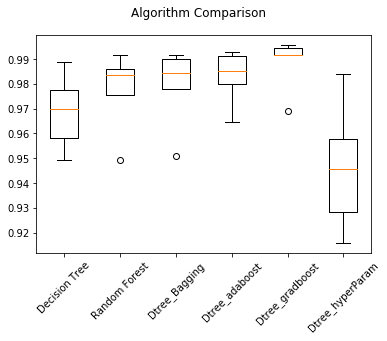

In [71]:
result=[]
names=[]
model_perf = []
for i,j in model:
    kfold = model_selection.KFold(5,random_state=111)
    accuracy = (model_selection.cross_val_score(j,X,y,scoring='r2',cv=kfold))
    result.append(accuracy)
    names.append(i)
    model_perf.append((np.average(result),np.var(result)))
    
#Plotting box plot 
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.xticks(rotation =45)
plt.show()

In [72]:
result

[array([0.96978504, 0.98856063, 0.9581416 , 0.97760889, 0.94913514]),
 array([0.98352122, 0.99177376, 0.94944709, 0.98610132, 0.97561427]),
 array([0.98415886, 0.99152523, 0.95079954, 0.99009677, 0.97802501]),
 array([0.99127102, 0.99280363, 0.96451549, 0.98492431, 0.97977268]),
 array([0.99166403, 0.99550866, 0.96888352, 0.99140653, 0.99432346]),
 array([0.92848755, 0.9576064 , 0.91583232, 0.98406423, 0.94577078])]

In [73]:
model_perf

[(0.9686462600838011, 0.00019384789670097517),
 (0.9729688959664102, 0.00022603738934857395),
 (0.9749529581280824, 0.0002320858901555789),
 (0.9768790757487862, 0.00021118070060113778),
 (0.9791747085644523, 0.0002094721675736376),
 (0.9737042995249436, 0.0004175137125086971)]